done
done
(100000, 28, 28, 1)
(100000, 28, 28, 1)


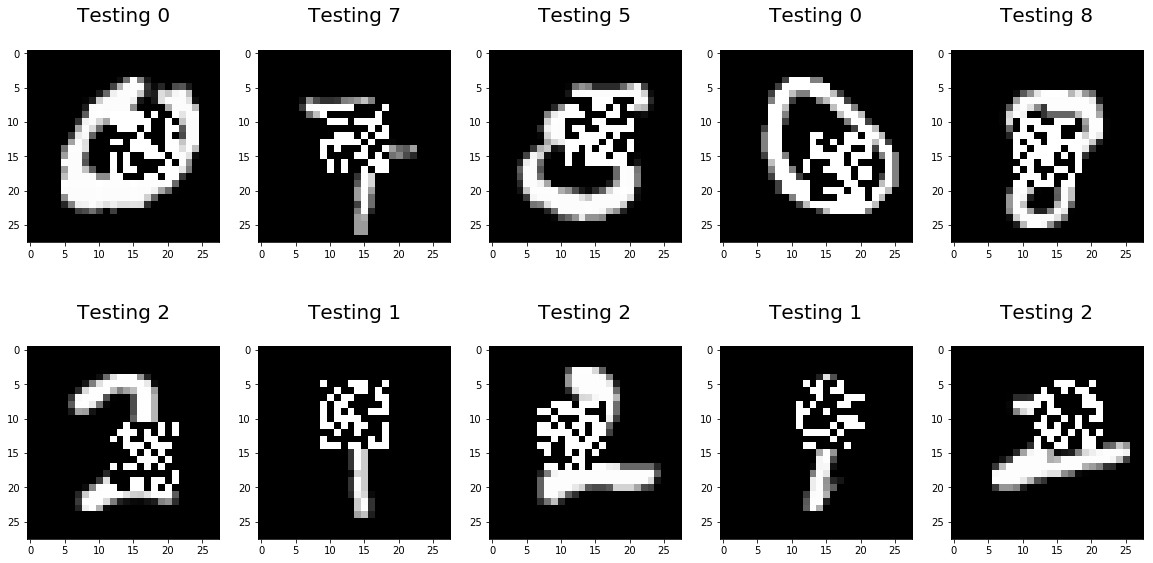

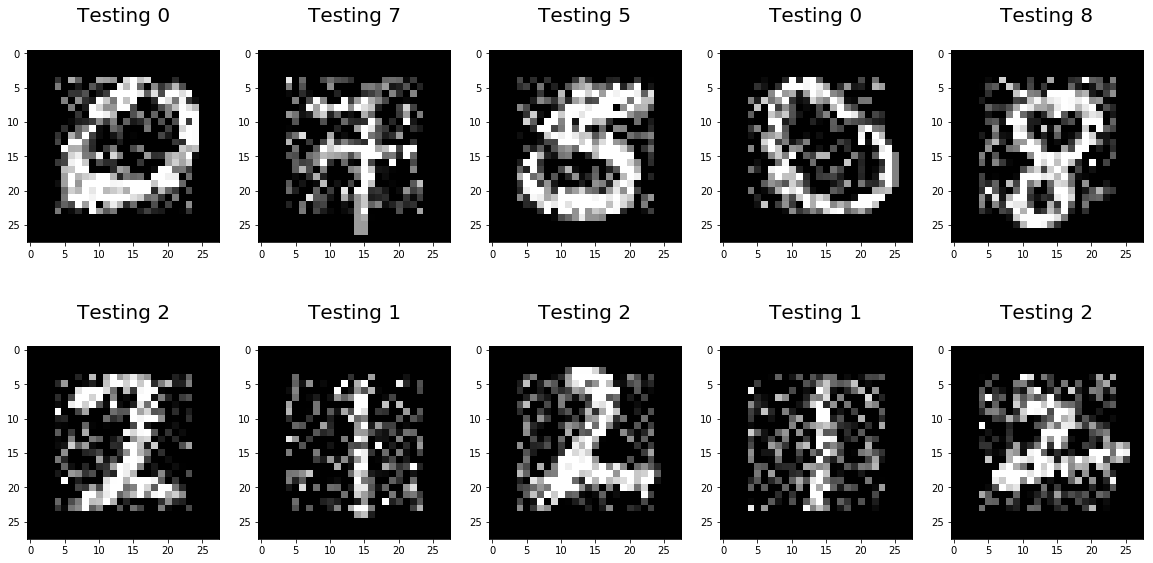

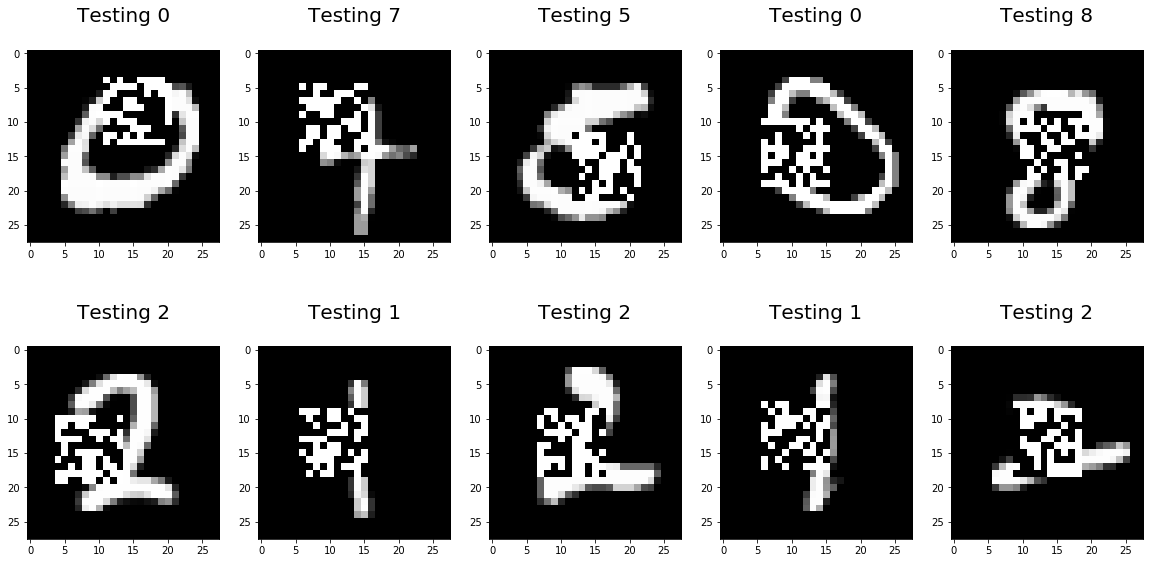

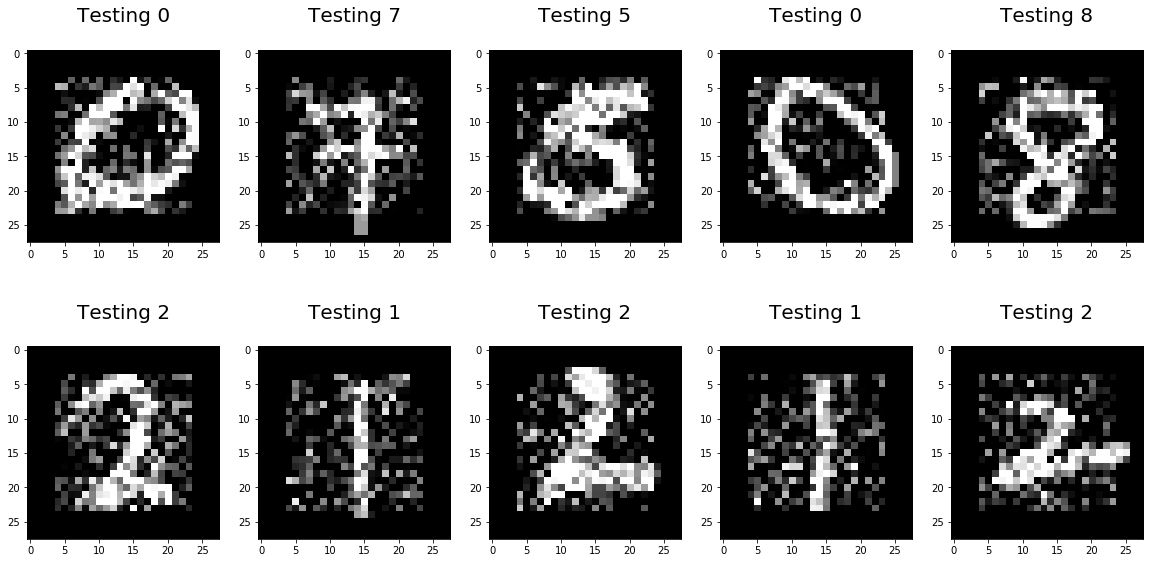

In [72]:
from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,UpSampling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau

from scipy.io import loadmat
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D,UpSampling2D
from keras.optimizers import RMSprop
from keras.callbacks import ReduceLROnPlateau


data_path = "./data.mat"
data_raw = loadmat(data_path)

train_img = data_raw["train_img"]
test_img = data_raw["test_img"]
train_lbl = data_raw["train_lbl"]

#reshape into 28 by 28 matrixes


train=np.reshape(train_img, (50000,28,28))
test=np.reshape(test_img, (20000,28,28))



train1=np.array(train, copy=True)


#generate sub-training set 1,in which the stain effect on the image is considered
for i in train1:
    stain=np.empty((10,10),dtype=int)
    a = np.random.random((10,10))
    stain[a>=0.5]=255;
    stain[a<0.5]=0;
    d=np.random.randint(0,9, size=(2))
    i[(4+d[0]):(14+d[0]),(4+d[1]):(14+d[1])]=stain



plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train1[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)


#generate sub-training set 2,in which the gussian noise effect on the image is considered
#when add noise, the orginal uint8 format would includes warpperaround which we want to avoid, thereby
#I convert the array into int32, any after the addition with gassuian noise in terms of each element of the array
#I config the pixel value larger than 255 as 255， which of that are lower than 0 as 0.
train2=np.array(train, copy=True)  
train2=np.array(train2,dtype=int)
for i in train2:
    a=np.random.normal(0, 100, (20,20))
    a=a.astype(int)
    i[4:24,4:24]=i[4:24,4:24]+a
    i[i>=255]=255
    i[i<=0]=0
#this conversion of adding noise only take roughly 20s at my pc end
print("done") 



##plot the frist 10 graph to check
train2=np.array(train2,dtype='uint8')
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train2[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)
    


train_o=np.array(train,  copy=True)
train_o=train_o/255
train_o = np.reshape(train_o,(-1,28,28,1))
train1=train1/255
train1=np.reshape(train1,(-1,28,28,1))
train2=train2/255
train2=np.reshape(train2,(-1,28,28,1))
                      
test = np.reshape(test,(-1,28,28,1))
test=test/255    
#combine subset 1 and subset 2 to form a new big training set 
train=np.concatenate((train_o,train1, train2), axis=0)
train_l=np.concatenate((train_lbl,train_lbl, train_lbl), axis=0)
train.shape

from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#reshape image in 3 dimensions: height=28,width=1, cacal=1


#encode labels to hot vectors, e.g. 3->[0,0,0,1,0,0,0,0,0,0]
train_l = to_categorical(train_l , num_classes = 10)
train_l.shape
random_seed=3
x_trn, x_tst, y_trn,y_tst = train_test_split(train, train_l, test_size = 0.2, random_state=random_seed)
data_path = "./data.mat"
data_raw = loadmat(data_path)

train_img = data_raw["train_img"]
test_img = data_raw["test_img"]
train_lbl = data_raw["train_lbl"]

#reshape into 28 by 28 matrixes


train=np.reshape(train_img, (50000,28,28))
test=np.reshape(test_img, (20000,28,28))



train1=np.array(train, copy=True)


#generate sub-training set 1,in which the stain effect on the image is considered
for i in train1:
    stain=np.empty((10,10),dtype=int)
    a = np.random.random((10,10))
    stain[a>=0.5]=255;
    stain[a<0.5]=0;
    d=np.random.randint(0,9, size=(2))
    i[(4+d[0]):(14+d[0]),(4+d[1]):(14+d[1])]=stain



plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train1[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)


#generate sub-training set 2,in which the gussian noise effect on the image is considered
#when add noise, the orginal uint8 format would includes warpperaround which we want to avoid, thereby
#I convert the array into int32, any after the addition with gassuian noise in terms of each element of the array
#I config the pixel value larger than 255 as 255， which of that are lower than 0 as 0.
train2=np.array(train, copy=True)  
train2=np.array(train2,dtype=int)
for i in train2:
    a=np.random.normal(0, 100, (20,20))
    a=a.astype(int)
    i[4:24,4:24]=i[4:24,4:24]+a
    i[i>=255]=255
    i[i<=0]=0
#this conversion of adding noise only take roughly 20s at my pc end
print("done") 



##plot the frist 10 graph to check
train2=np.array(train2,dtype='uint8')
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(train2[0:10], train_lbl[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray)
    plt.title('Testing %i\n' % label, fontsize = 20)
    


train_o=np.array(train,  copy=True)
train_o=train_o/255
train_o = np.reshape(train_o,(-1,28,28,1))
train1=train1/255
train1=np.reshape(train1,(-1,28,28,1))
train2=train2/255
train2=np.reshape(train2,(-1,28,28,1))
                      
test = np.reshape(test,(-1,28,28,1))
test=test/255    
#combine subset 1 and subset 2 to form a new big training set 
train=np.concatenate((train1, train2), axis=0)

train_l=np.concatenate((train_o, train_o), axis=0)

print(train.shape)
print(train_l.shape)
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
#reshape image in 3 dimensions: height=28,width=1, cacal=1


#encode labels to hot vectors, e.g. 3->[0,0,0,1,0,0,0,0,0,0]
#train_l = to_categorical(train_l , num_classes = 10)
#train_l.shape

#train_lbl = to_categorical(train_lbl , num_classes = 10)

In [19]:
#including the compound form
random_seed=3

x_o, j,y_o,yj = train_test_split(train_o, train_lbl,test_size = 0.2, random_state=random_seed)

x_noise1, a,y_noise1,b = train_test_split(train1,train_lbl, test_size = 0.2, random_state=random_seed)

x_noise2, c, y_noise2,d = train_test_split(train2,train_lbl, test_size = 0.6, random_state=random_seed)





x_compound=np.concatenate((x_o,x_noise1,x_noise2),axis=0)
y_compound=np.concatenate((y_o,y_noise1,y_noise2),axis=0)

print(x_compound.shape)
print(y_compound.shape)



(100000, 28, 28, 1)
(100000, 10)


In [ ]:
#only included the noisy term accoring proportion
random_seed=3

#x_noise1, a, x_clean1,b = train_test_split(train1,train_o, test_size = 0.2, random_state=random_seed)

#x_noise2, c,x_clean2,d = train_test_split(train2,train_o, test_size = 0.6, random_state=random_seed)


#x_noise=np.concatenate((x_noise1,x_noise2), axis=0)
#x_clean=np.concatenate((x_clean1,x_clean2), axis=0)
print(x_noise.shape)
print(x_clean.shape)

In [15]:
x_train_noisy, x_test_noisy,x_train_clean,x_test_clean = train_test_split(train,train_l, test_size = 0.1, random_state=random_seed)


In [ ]:
import keras
from keras.layers import Activation, Dense, Input
from keras.layers import Conv2D, Flatten
from keras.layers import Reshape, Conv2DTranspose
from keras.models import Model
from keras import backend as K

noise=np.concatenate((train_o,train1, train2), axis=0)
clean=np.concatenate((train_o,train_o, train_o), axis=0)

train_l=np.concatenate((train_lbl,train_lbl, train_lbl), axis=0)

train_l = to_categorical(train_l , num_classes = 10)
train_l.shape
train=np.concatenate((train_o,train1, train2), axis=0)

x=autoencoder.predict(train)
x=autoencoder.predict(x)
random_seed=3
x_trn, x_tst,y_trn,y_tst = train_test_split(x,train_l, test_size = 0.2, random_state=random_seed)
print("done")

In [ ]:
prediction_ = autoencoder.predict(prediction1)

In [5]:

x_trn,x_tst,y_trn,y_tst = train_test_split(prediction1,train_l, test_size = 0.2, random_state=random_seed)


In [82]:
from keras.preprocessing.image import ImageDataGenerator
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
# Define the optimizer
#optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

#0.001
#0.002
#0.00025
epochs = 30  #pochs to 30 to get 0.9967 accuracy
size = 200
# Compile the model
model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
          
model.fit(x_trn,y_trn, batch_size=size, epochs = epochs, validation_data=(x_tst,y_tst), shuffle=True,
                              verbose = 1, callbacks=[learning_rate_reduction])

  

#datagen.fit(x_trn)
#history = model.fit_generator(datagen.flow(x_trn,y_trn, batch_size=100),
                              #epochs = epochs, validation_data = (x_tst,y_tst),
                             # verbose = 1, steps_per_epoch= (x_trn.shape[0]/size), callbacks=[learning_rate_reduction])

Train on 120000 samples, validate on 30000 samples
Epoch 1/30
120000/120000 [==============================] - 461s - loss: 0.3466 - acc: 0.8945 - val_loss: 0.2095 - val_acc: 0.9334
Epoch 2/30
120000/120000 [==============================] - 880s - loss: 0.2370 - acc: 0.9279 - val_loss: 0.1981 - val_acc: 0.9370
Epoch 3/30
120000/120000 [==============================] - 928s - loss: 0.2163 - acc: 0.9330 - val_loss: 0.1829 - val_acc: 0.9418
Epoch 4/30
120000/120000 [==============================] - 922s - loss: 0.2035 - acc: 0.9357 - val_loss: 0.1722 - val_acc: 0.9442
Epoch 5/30
120000/120000 [==============================] - 929s - loss: 0.1922 - acc: 0.9387 - val_loss: 0.1667 - val_acc: 0.9459
Epoch 6/30
120000/120000 [==============================] - 960s - loss: 0.1850 - acc: 0.9409 - val_loss: 0.1644 - val_acc: 0.9454
Epoch 7/30
120000/120000 [==============================] - 929s - loss: 0.1762 - acc: 0.9433 - val_loss: 0.1599 - val_acc: 0.9483
Epoch 8/30
120000/120000 [======

In [10]:
model.save('2018510.h5')


In [85]:
prediction1 = autoencoder.predict(test)
predict_model2=model.predict(prediction1)
Y_prediction=np.argmax(predict_model2,axis = 1) 
Y_prediction
import pandas as pd
df=pd.read_csv("Sample-Submission.csv")
df['Prediction']=Y_prediction
df.to_csv("sub5.csv",index=False)
print("done")


done


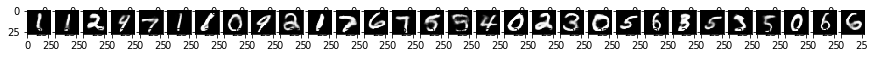

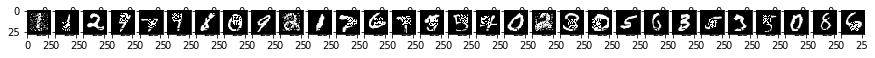

In [34]:
n=30
plt.figure(figsize=(15,10))
for i in range(n):
    
    ax1 = plt.subplot(1, n, i+1)
    plt.imshow(predict_model[i+10].reshape(28, 28))
    plt.gray()
plt.show()    
plt.figure(figsize=(15,10))
for i in range(n):
    ax2 = plt.subplot(1, n, i+1)
    plt.imshow(test[i+10].reshape(28, 28))
    plt.gray()

plt.show()



[0 6 5 ..., 8 2 8]
done


In [11]:

from keras.models import load_model

model = load_model('2018510.h5')

In [12]:
prediction=autoencoder.predict(test)
print('done')

done


In [13]:
prediction_ = model.predict(prediction)
Y_prediction=np.argmax(prediction_,axis = 1) 
print(Y_prediction)
import pandas as pd
df=pd.read_csv("Sample-Submission.csv")
df['Prediction']=Y_prediction
df.to_csv("denoising_final.csv",index=False)
print("done")

[5 6 5 ..., 8 2 8]
done


In [ ]:

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_trn)
history = model.fit_generator(datagen.flow(x_trn,y_trn, batch_size=100),
                              epochs = epochs, validation_data = (x_tst,y_tst),
                              verbose = 1, steps_per_epoch= (x_trn.shape[0]/size), callbacks=[learning_rate_reduction])